In [3]:
import pandas
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plot
import seaborn
from numpy.random import choice
from math import sqrt
import chardet


nltk.download('vader_lexicon')
'''from transformers import BertTokenizer, BertModel
import torch
nlp = spacy.load("en_core_web_sm")
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')'''


#caracteristici
data_file = 'data/reviews_mixed.csv'
reviews_data = pandas.read_csv(data_file)
reviews = reviews_data['Text'].fillna('')

#Bag of Words
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(reviews)
print(bow_matrix.toarray())
print(count_vectorizer.get_feature_names_out())

ImportError: cannot import name 'triu' from 'scipy.linalg' (/home/codespace/.local/lib/python3.10/site-packages/scipy/linalg/__init__.py)

In [326]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)
print(tfidf_matrix.toarray())
print(tfidf_vectorizer.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['12am' '15' '15th' '1990' '30' '302' '40' '4th' '650' 'about' 'above'
 'abundant' 'ac' 'access' 'across' 'actually' 'added' 'adjust' 'adults'
 'advertised' 'advised' 'after' 'agreed' 'ahead' 'air' 'aircon' 'all'
 'allow' 'also' 'although' 'always' 'amazing' 'ambience' 'amenities'
 'amenity' 'ample' 'an' 'and' 'anda' 'any' 'anymore' 'anything' 'apart'
 'appeal' 'are' 'area' 'aren' 'around' 'art' 'as' 'at' 'available'
 'avenue' 'awesome' 'bags' 'bar' 'barely' 'basic' 'bath' 'bathroom'
 'bathrooms' 'bathtub' 'be' 'because' 'bed' 'bedding' 'bedroom' 'beds'
 'been' 'before' 'being' 'best' 'big' 'bigger' 'bit' 'blanket' 'blind'
 'boil' 'book' 'booking' 'both' 'bothering' 'bright' 'broken' 'building'
 'bunting' 'by' 'cable' 'cables' 'called' 'came' 'can' 'cap' 'card'
 'carpets' 'center' 'challenge' 'change' 'changed' 'channel' 'channels'


In [328]:
#Word2Vec
#tokenize
tokenized_reviews = [word_tokenize(review.lower()) for review in reviews]
    
#train
word2vec_model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(tokenized_reviews, total_examples=len(tokenized_reviews), epochs=10)

#obtinere vector pentru un cuvant
sample_word = tokenized_reviews[0][3] 
if sample_word in word2vec_model.wv:
    print(f"Vectorul pentru '{sample_word}':")
    print(word2vec_model.wv[sample_word])
else:
    print(f"Nu exista date pentru cuvantul '{sample_word}'!")

#stocare rezultate
bm = bow_matrix
tm = tfidf_matrix
tr = tokenized_reviews

Vectorul pentru 'extremely':
[ 0.00576555  0.02389267 -0.00743388 -0.00349018  0.00318297 -0.03644966
  0.02437921  0.04346495 -0.02997683 -0.01678424 -0.00966515 -0.02467462
  0.00092657  0.00202294  0.014439   -0.00604997 -0.00080637 -0.01154709
 -0.00830653 -0.0572946   0.00658535  0.01310846  0.01966501 -0.02139865
 -0.01441252 -0.0072648  -0.02165187 -0.01818462 -0.01715129 -0.00067208
  0.01935058  0.00959349  0.0020237  -0.02284094 -0.0140984   0.0432451
 -0.00278956 -0.01390671 -0.01933877 -0.02459475  0.01884623 -0.00625083
 -0.01317672  0.0083941   0.03353405 -0.01142792 -0.02160742 -0.0023763
  0.02232265  0.00177091  0.01911835 -0.01982357  0.00737777 -0.00747892
 -0.01137691  0.01876825  0.00622163  0.00564409 -0.01848941  0.00770066
  0.01359284  0.00271832  0.00218369 -0.00207329 -0.02560514  0.01669455
  0.00996875  0.0218244  -0.03617397  0.02828421 -0.02038471  0.01127718
  0.02413745  0.00903981  0.02237259  0.00791918 -0.00651585 -0.01003184
 -0.01169395  0.00991319

In [330]:
#alta caracteristica
#analiza sentimentelor
sia = SentimentIntensityAnalyzer()
for review in reviews.head(10):
    sentiment_score = sia.polarity_scores(review)
    print(f"To review: {review}")
    print(f"Sentiment scores: {sentiment_score}")

To review: The rooms are extremely small, practically only a bed.
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
To review: Room safe did not work.
Sentiment scores: {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
To review: Mattress very comfortable.
Sentiment scores: {'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'compound': 0.5563}
To review: Very uncomfortable, thin mattress, with plastic cover that rustles every time you move.
Sentiment scores: {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.4391}
To review: No bathroom in room
Sentiment scores: {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.296}
To review: The bed was soooo comfy.
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
To review: someone must have been smoking in the room next door.
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
To review: The bed is very comfortable.
Sentiment scores: {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 

In [332]:
#alta caracteristica
#stemming
stemmed_reviews_flat = [word for review in stemmed_reviews for word in review]

print(stemmed_reviews_flat)

['the', 'room', 'are', 'extrem', 'small', ',', 'practic', 'onli', 'a', 'bed', '.', 'room', 'safe', 'did', 'not', 'work', '.', 'mattress', 'veri', 'comfort', '.', 'veri', 'uncomfort', ',', 'thin', 'mattress', ',', 'with', 'plastic', 'cover', 'that', 'rustl', 'everi', 'time', 'you', 'move', '.', 'no', 'bathroom', 'in', 'room', 'the', 'bed', 'wa', 'soooo', 'comfi', '.', 'someon', 'must', 'have', 'been', 'smoke', 'in', 'the', 'room', 'next', 'door', '.', 'the', 'bed', 'is', 'veri', 'comfort', '.', 'veri', 'spaciou', 'room', ',', 'quiet', 'and', 'veri', 'comfort', '.', 'for', '3', 'peopl', 'in', 'a', 'bedroom', 'the', 'sofa', 'bed', 'is', 'a', 'bit', 'unconfort', '.', 'light', 'in', 'the', 'common', 'room', 'were', 'too', 'dim', '.', 'air', 'condit', 'work', 'fine', '.', 'so', 'if', 'you', "'re", 'the', 'type', 'that', 'like', 'to', 'let', 'water', 'run', 'a', 'bit', 'befor', 'get', 'wet', 'or', 'it', 'take', 'a', 'minut', 'to', 'figur', 'out', 'how', 'to', 'make', 'it', 'hot', ',', 'you', 

Raportul de clasificare - clusters mapped la clase: 
              precision    recall  f1-score   support

    negative       0.69      1.00      0.81        35
    positive       1.00      0.06      0.11        17

    accuracy                           0.69        52
   macro avg       0.84      0.53      0.46        52
weighted avg       0.79      0.69      0.58        52

Confusion Matrix - clusters mapped la clase: 
[[35  0]
 [16  1]]


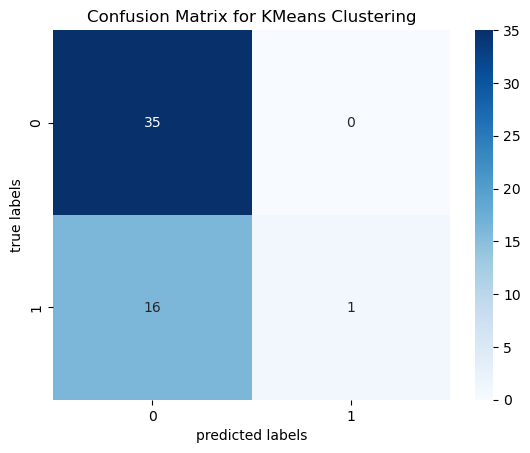

In [334]:
#etichetarea
data = pandas.read_csv(data_file)
texts = data['Text']
sentiments = data['Sentiment']

tfidf_vectorizer = TfidfVectorizer(max_features = 1000, stop_words = 'english')
tfidf_features = tfidf_vectorizer.fit_transform(texts)

tfidf_features_train, tfidf_features_test, sentiments_train, sentiments_test = train_test_split(tfidf_features, sentiments, test_size = 0.25, random_state = 2)
sentiments_train = sentiments_train.reset_index(drop = True)

#KMeans Clustering - tool
n_clusters = len(set(sentiments_train))
kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 42)
kmeans.fit(tfidf_features_train)

sentiments_pred_clusters = kmeans.predict(tfidf_features_test)

cluster_labels = kmeans.labels_
label_mapping = {}
for cluster_id in set(cluster_labels):
    index = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    valid_labels = [sentiments_train.iloc[i] for i in index if i in sentiments_train.index]
    if valid_labels:
        label_mapping[cluster_id] = max(set(valid_labels), key = valid_labels.count)
cluster_labels = label_mapping

sentiments_pred = [cluster_labels[cluster] for cluster in sentiments_pred_clusters]

#evaluare KMeans Clustering
print("Raportul de clasificare - clusters mapped la clase: ")
print(classification_report(sentiments_test, sentiments_pred))
print("Confusion Matrix - clusters mapped la clase: ")
print(confusion_matrix(sentiments_test, sentiments_pred))

seaborn.heatmap(confusion_matrix(sentiments_test, sentiments_pred), annot = True, fmt = 'd', cmap = 'Blues')
plot.xlabel('predicted labels')
plot.ylabel('true labels')
plot.title('Confusion Matrix for KMeans Clustering')
plot.show()

#predictie
model = kmeans
#new_reviews = ["lovely comfortable amazing", "hated this movie"]
#new_features = tfidf_vectorizer.transform(new_reviews)
#predictions = model.predict(new_features)
#print("Predictions:", list(zip(new_reviews, predictions)))

Raportul de clasificare:
              precision    recall  f1-score   support

    negative       0.76      0.97      0.85        38
    positive       0.67      0.14      0.24        14

    accuracy                           0.75        52
   macro avg       0.71      0.56      0.54        52
weighted avg       0.73      0.75      0.68        52

Confusion Matrix:
[[37  1]
 [12  2]]




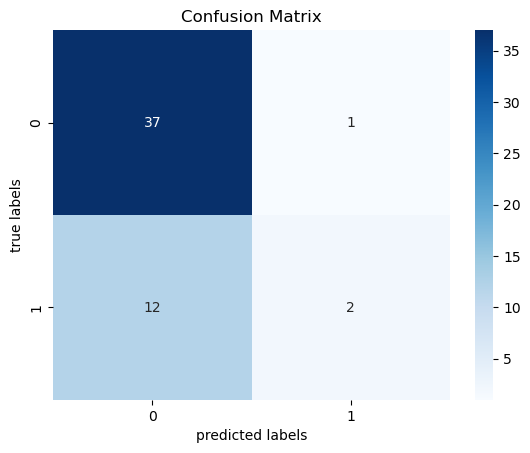

In [336]:
#alternativa - LogisticRegression
vectorizer = TfidfVectorizer(max_features = 1000, stop_words = 'english')
features = vectorizer.fit_transform(texts)

features_train, features_test, sentiments_train, sentiments_test = train_test_split(features, sentiments, test_size=0.25, random_state=42)

model = LogisticRegression(random_state = 42)
model.fit(features_train, sentiments_train)
sentiments_pred = model.predict(features_test)

#evaluare Logistic Reg
print("Raportul de clasificare:")
print(classification_report(sentiments_test, sentiments_pred))
cm = confusion_matrix(sentiments_test, sentiments_pred)
print("Confusion Matrix:")
print(cm)
print('\n')

seaborn.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plot.xlabel('predicted labels')
plot.ylabel('true labels')
plot.title('Confusion Matrix')
plot.show()

Raportul de clasificare:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1202
        spam       0.96      0.84      0.90       191

    accuracy                           0.97      1393
   macro avg       0.97      0.92      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Confusion Matrix:
[[1196    6]
 [  31  160]]




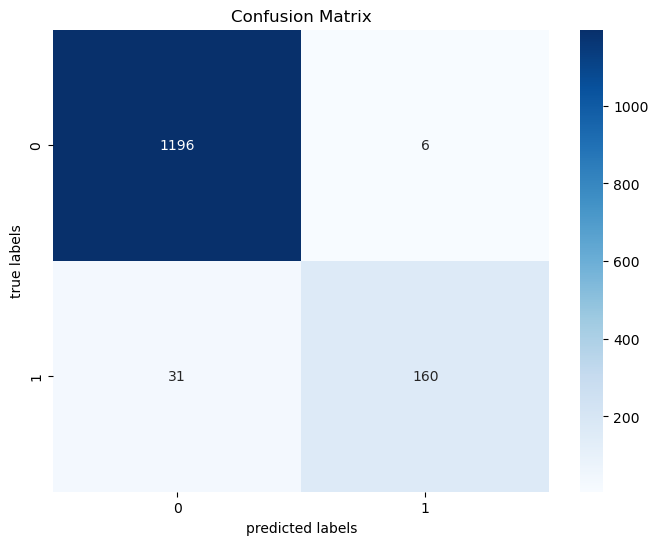

Predictions: [('lovely comfortable amazing', 'ham'), ('hated this movie', 'ham')]


In [338]:
#spam/ham
file_path = 'data/spam.csv'
with open(file_path, 'rb') as file:
    sample = file.read(10000)

#detected = chardet.detect(sample)
#print("Detected encoding:", detected['encoding'])

data = pandas.read_csv(file_path, encoding = 'windows-1252')
texts = data['emailText']
labels = data['emailType']

#extragere caracteristici cu TF-ID
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)
features = vectorizer.fit_transform(texts)

#impartire set de date in seturi de antrenare si testare
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)
labels_train = labels_train.reset_index(drop=True)

#KMeans 
n_clusters = len(set(labels_train))
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(features_train)

sentiments_pred_clusters = kmeans.predict(features_test)

#etichete majoritare pentru fiecare cluster
cluster_labels = kmeans.labels_
label_mapping = {}
for cluster_id in set(cluster_labels):
    index = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    valid_labels = [labels_train.iloc[i] for i in index if i in labels_train.index]
    if valid_labels:
        label_mapping[cluster_id] = max(set(valid_labels), key=valid_labels.count)

#mapare clusterelor la etichetele corespunzatoare
sentiments_pred = [label_mapping[cluster] for cluster in sentiments_pred_clusters]

#evaluare performanta model
print("Raportul de clasificare:")
print(classification_report(labels_test, labels_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(labels_test, labels_pred))
print('\n')

plot.figure(figsize = (8, 6))
seaborn.heatmap(confusion_matrix(labels_test, labels_pred), annot = True, fmt = 'd', cmap = 'Blues')
plot.xlabel('predicted labels')
plot.ylabel('true labels')
plot.title('Confusion Matrix')
plot.show()

#predictie
model = kmeans
new_reviews = ["lovely comfortable amazing", "hated this movie"]
new_features = vectorizer.transform(new_reviews)
predictions = model.predict(new_features)
predicted_labels = [label_mapping[pred] for pred in predictions]
print("Predictions:", list(zip(new_reviews, predicted_labels)))

Raportul de clasificare:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1202
        spam       0.96      0.84      0.90       191

    accuracy                           0.97      1393
   macro avg       0.97      0.92      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Confusion Matrix:
[[1196    6]
 [  31  160]]




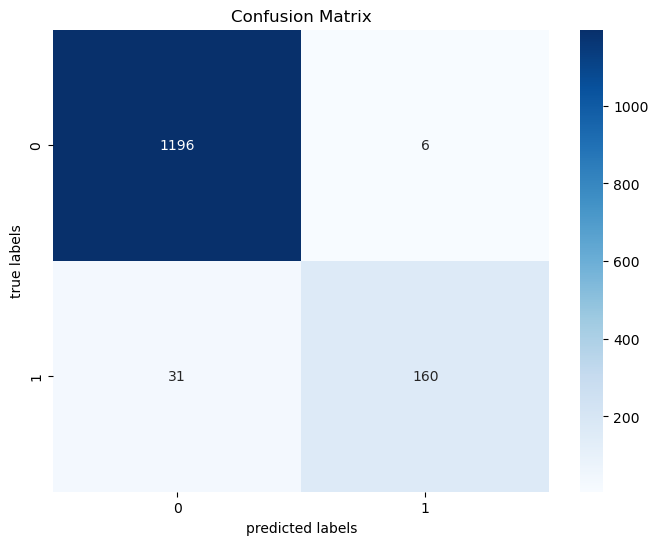

In [340]:
#alternativa - naive bayes
file_path = 'data/spam.csv'
with open(file_path, 'rb') as file:
    sample = file.read(10000)

#detected = chardet.detect(sample)
#print("Detected encoding:", detected['encoding'])

data = pandas.read_csv(file_path, encoding = 'windows-1252')
texts = data['emailText']
labels = data['emailType']

#extragere caracteristici cu TF-ID
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)
features = vectorizer.fit_transform(texts)

#impartire set de date in seturi de antrenare si testare
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

model = MultinomialNB()
model.fit(features_train, labels_train)

#predictia etichetelor pentru setul de testare
labels_pred = model.predict(features_test)

#evaluare performanta model
print("Raportul de clasificare:")
print(classification_report(labels_test, labels_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(labels_test, labels_pred))
print('\n')

plot.figure(figsize = (8, 6))
seaborn.heatmap(confusion_matrix(labels_test, labels_pred), annot = True, fmt = 'd', cmap = 'Blues')
plot.xlabel('predicted labels')
plot.ylabel('true labels')
plot.title('Confusion Matrix')
plot.show()